In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading csv file.
Healthcare = pd.read_csv("~/work/health_care_diabetes.csv")

In [3]:
# Dimensions of the dataset
Healthcare.shape

(768, 9)

In [4]:
# Head of the data.
Healthcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Tail of the data.
Healthcare.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Describing mean,median,min,max,standard deviation and quartiles of the data.
Healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checking for null values
Missing_values = Healthcare.columns.isnull().sum()
Missing_values

0

In [8]:
# Information of the data types in the data.
Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# columns names
Healthcare.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# converting column names into lower-case.
Healthcare.columns = Healthcare.columns.str.lower()
Healthcare.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [11]:
# Target variable
Healthcare.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [12]:
# Exploratory data analysis
Healthcare.outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: outcome, dtype: float64

<AxesSubplot:ylabel='outcome'>

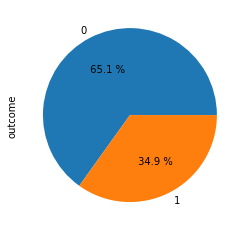

In [13]:
Healthcare.outcome.value_counts().plot(kind='pie',
                                    autopct = ' %1.1f %%', 
                                    )

<AxesSubplot:>

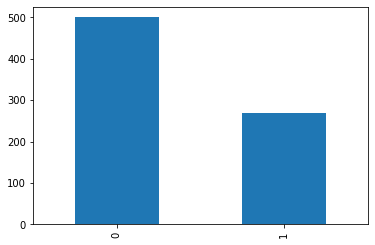

In [14]:
Healthcare.outcome.value_counts().plot(kind="bar")

In [15]:
Healthcare.groupby("pregnancies").outcome.value_counts()

pregnancies  outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            1           25
             0           20
8            1           22
             0           16
9            1           18
             0           10
10           0           14
             1           10
11           1            7
             0            4
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome', ylabel='pregnancies'>

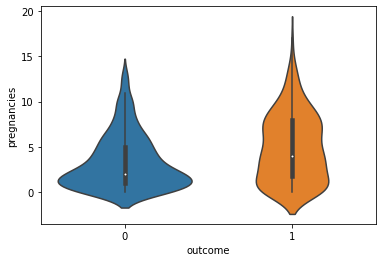

In [16]:
sns.violinplot(x='outcome',y='pregnancies',data=Healthcare)

<AxesSubplot:xlabel='outcome', ylabel='age'>

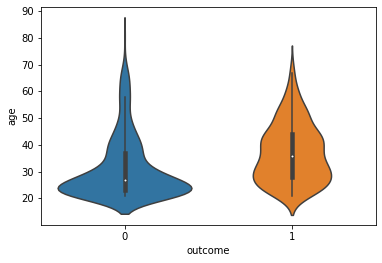

In [17]:
sns.violinplot(x='outcome',y='age',data=Healthcare)

Text(0, 0.5, 'distribution')

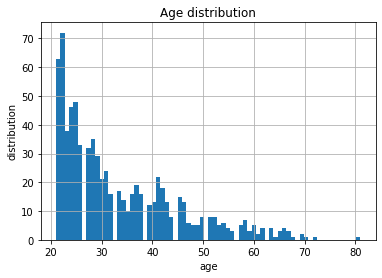

In [18]:
Healthcare.age.hist(bins=70)
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('distribution')

In [19]:
Healthcare.glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [20]:
median_glucose = Healthcare.glucose.median()
median_glucose

117.0

In [21]:
Healthcare.glucose.fillna(117,axis=0,inplace=True)

In [22]:
Healthcare.glucose.unique()[57]

0

In [23]:
Healthcare.glucose.unique()[57] = Healthcare.glucose.unique()[57]+117

In [24]:
Healthcare.glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [25]:
Healthcare.glucose.isnull().sum()

0

In [26]:
Healthcare.bloodpressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [27]:
Healthcare.bloodpressure.unique()[6]

0

In [28]:
Healthcare.skinthickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [29]:
Healthcare.skinthickness.unique()[2]

0

In [30]:
Healthcare.insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [31]:
Healthcare.insulin.unique()[0]

0

In [32]:
Healthcare.bmi.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [33]:
Healthcare.bmi.unique()[9]

0.0

In [34]:
# Correlation between variables
Healthcare.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

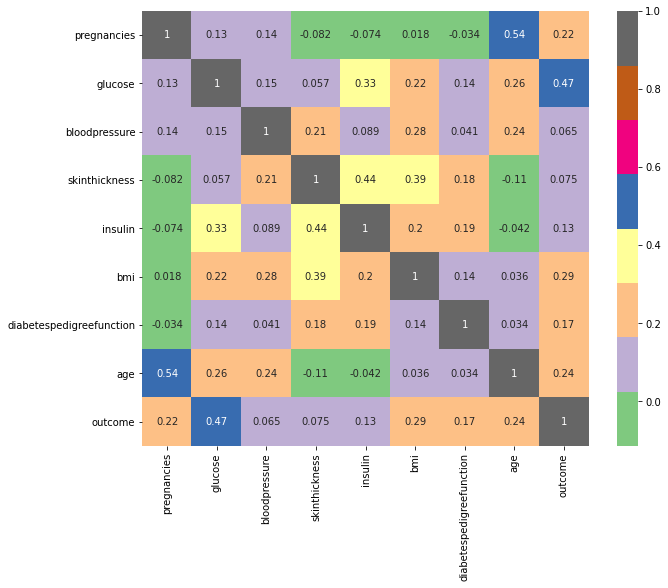

In [35]:
# plotting heatmop
plt.figure(figsize=(10,8))
sns.heatmap(Healthcare.corr(),annot=True,cmap='Accent')

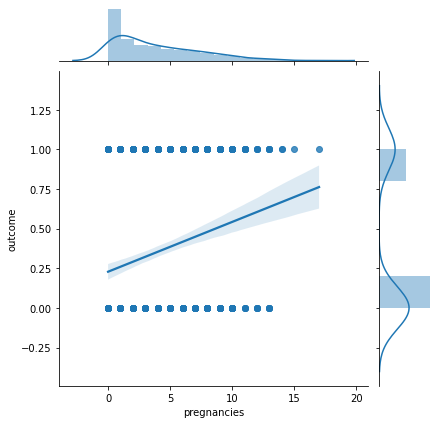

In [36]:
sns.jointplot(x='pregnancies',y='outcome',data=Healthcare,kind='reg')

In [37]:
Healthcare.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

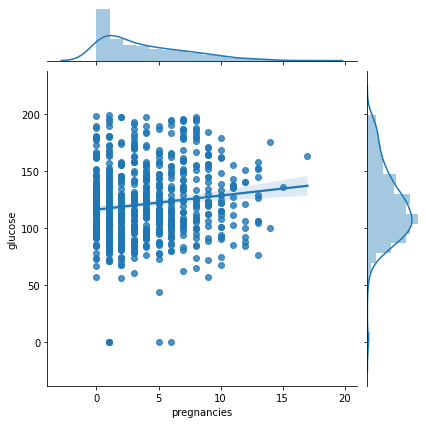

In [38]:
sns.jointplot(x='pregnancies',y='glucose',data=Healthcare,kind='reg')

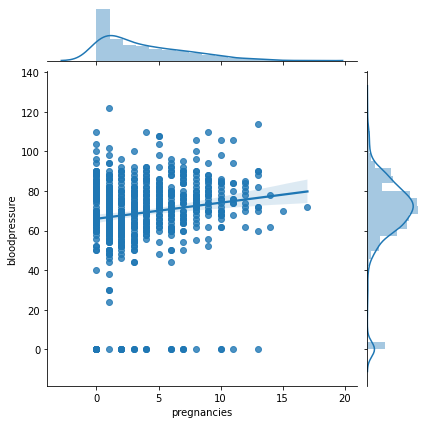

In [39]:
sns.jointplot(x='pregnancies',y='bloodpressure',data=Healthcare,kind='reg')

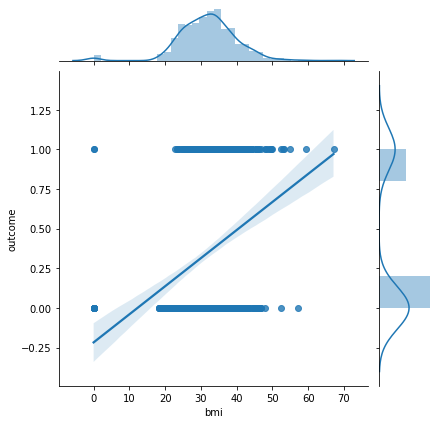

In [40]:
sns.jointplot(x='bmi',y='outcome',data=Healthcare,kind='reg')

<Figure size 720x576 with 0 Axes>

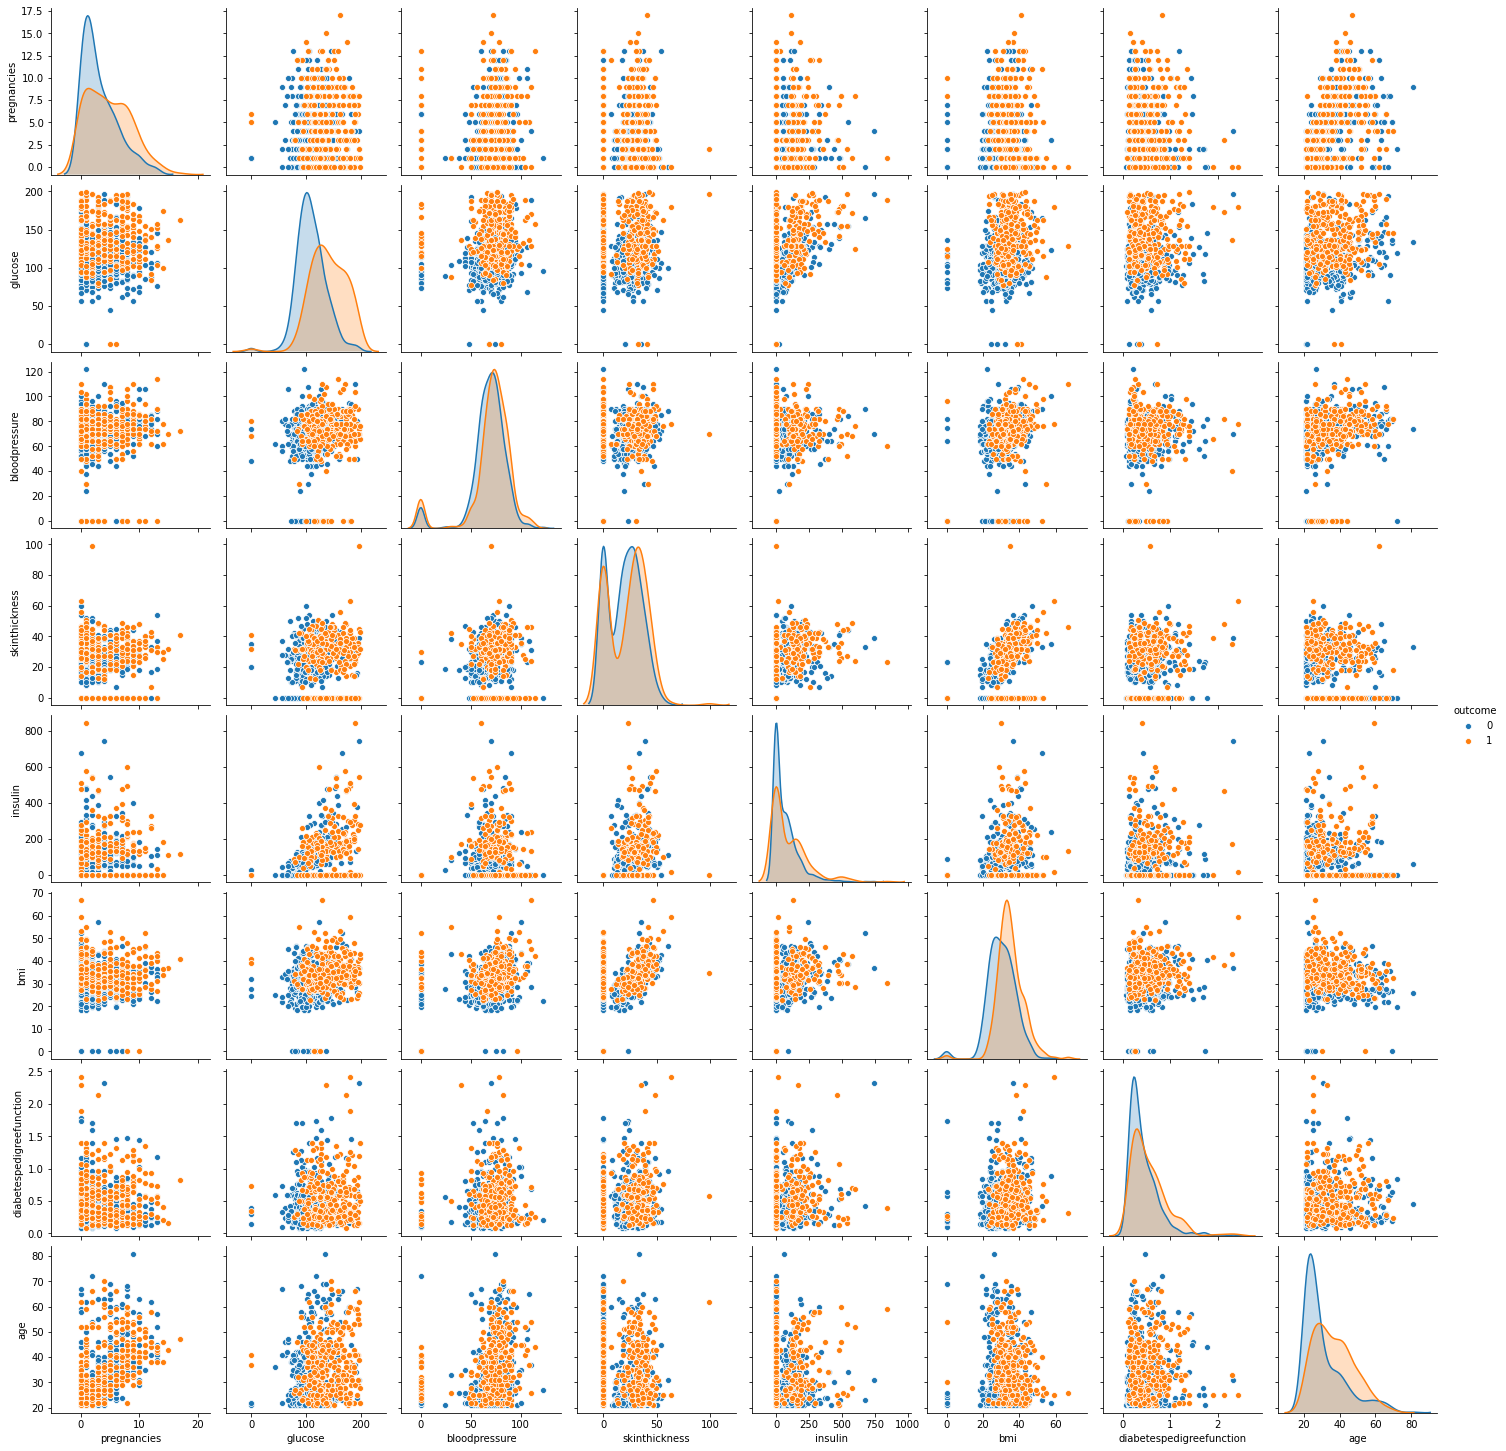

In [41]:
plt.figure(figsize=(10,8))
sns.pairplot(Healthcare,hue='outcome')

# Extracting input (X) and output (Y) data from the dataset

In [42]:
X = Healthcare.iloc[:,0:8]

In [43]:
X.shape

(768, 8)

In [44]:
X.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age'],
      dtype='object')

In [45]:
X.shape

(768, 8)

In [46]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [47]:
y = Healthcare.iloc[:,[-1]]

In [48]:
y.shape

(768, 1)

In [49]:
y.columns

Index(['outcome'], dtype='object')

In [50]:
y.head()

,outcome
0,1
1,0
2,1
3,0
4,1


In [51]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [52]:
X.shape,y.shape

((768, 8), (768, 1))

# Dividing data into 70% train and 30% testing

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=5,
                                                 stratify=y
                                                )

In [54]:
X_train.shape,y_train.shape

((537, 8), (537, 1))

In [55]:
X_test.shape,y_test.shape

((231, 8), (231, 1))

# Standardizing the data

In [56]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler()
X_train_std = standard_data.fit_transform(X_train)
X_test_std = standard_data.fit_transform(X_test)

In [57]:
print('mean values before standardized:',np.sum(X_train.mean()),np.sum(X_test.mean()))

mean values before standardized: 355.37685847299815 370.3693852813853


In [58]:
print('mean values after standardized:',np.sum(X_train_std.mean()),np.sum(X_test_std.mean()))

mean values after standardized: -7.959699524779986e-18 -1.2736324741370844e-17


# Applying logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(C=100.0,random_state=2)
lr.fit(X_train_std,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_predict = lr.predict(X_test_std)

In [61]:
y_predict.shape,y_test.shape

((231,), (231, 1))

# Printing count of misclassified samples in the test data prediction as well as the accuracy score of the model and classification report

In [62]:
print('Misclassified samples: %d' % (y_test != [y_predict]).sum()) 
## Here out of 231 test samples we have misclassified 56 samples

Misclassified samples: 56


In [63]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.77      0.89      0.83       150\n           1       0.72      0.51      0.59        81\n\n    accuracy                           0.76       231\n   macro avg       0.74      0.70      0.71       231\nweighted avg       0.75      0.76      0.75       231\n'

In [64]:
accuracy_score(y_test,y_predict)*100

75.75757575757575

In [65]:
confusion_matrix(y_test,y_predict)

array([[134,  16],
       [ 40,  41]])

# SVM with kernal = Linear

In [66]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
y_prediction_svm = svm.predict(X_test_std)

In [68]:
y_prediction_svm.shape,y_test.shape

((231,), (231, 1))

In [69]:
print('Misclassified samples: %d' % (y_test != [y_prediction_svm]).sum())
print('Accuracy score:',accuracy_score(y_test,y_prediction_svm)*100)
print('Confussion_,atrix:',confusion_matrix(y_test,y_prediction_svm))
print('Classification report:',classification_report(y_test,y_prediction_svm))

Misclassified samples: 58
Accuracy score: 74.89177489177489
Confussion_,atrix: [[131  19]
 [ 39  42]]
Classification report:               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.69      0.52      0.59        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



# kernel = 'radial basis function'

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [71]:
y_prediction_svm_rbf = svm.predict(X_test_std)

In [72]:
y_prediction_svm_rbf.shape,y_test.shape

((231,), (231, 1))

In [73]:
print('Misclassified samples: %d' % (y_test != [y_prediction_svm_rbf]).sum())
print('Accuracy score:',accuracy_score(y_test,y_prediction_svm_rbf)*100)
print('Confussion_,atrix:',confusion_matrix(y_test,y_prediction_svm_rbf))
print('Classification report:',classification_report(y_test,y_prediction_svm_rbf))

Misclassified samples: 53
Accuracy score: 77.05627705627705
Confussion_,atrix: [[135  15]
 [ 38  43]]
Classification report:               precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.74      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



# Random forest classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_predict_rfr = rfr.predict(X_test_std)

In [76]:
y_predict_rfr.shape,y_test.shape

((231,), (231, 1))

In [77]:
print('Misclassified samples: %d' % (y_test != [y_predict_rfr]).sum())
print('Accuracy score:',accuracy_score(y_test,y_predict_rfr)*100)

Misclassified samples: 59
Accuracy score: 74.45887445887446


# criterion='entropy'

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(criterion='entropy')
rfr.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_predict_entropy = rfr.predict(X_test_std)

In [80]:
y_predict_entropy.shape,y_test.shape

((231,), (231, 1))

In [81]:
print('Misclassified samples: %d' % (y_test != [y_predict_entropy]).sum())
print('Accuracy score:',accuracy_score(y_test,y_predict_entropy)*100)

Misclassified samples: 54
Accuracy score: 76.62337662337663


# Decission tree classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train_std,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
y_predict_dtree = dtree.predict(X_test_std)

In [84]:
y_predict_dtree.shape,y_test.shape

((231,), (231, 1))

In [85]:
print('Misclassified samples: %d' % (y_test != [y_predict_dtree]).sum())
print('Accuracy score:',accuracy_score(y_test,y_predict_dtree)*100)

Misclassified samples: 67
Accuracy score: 70.995670995671


# Lets compare the above model with KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                          weights='distance',
                          algorithm='ball_tree',
                          metric='minkowski',
                          )
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [87]:
y_predict_knn = knn.predict(X_test_std)

In [88]:
y_predict_knn.shape,y_test.shape

((231,), (231, 1))

In [89]:
print('Misclassified samples: %d' % (y_test != [y_predict_knn]).sum())
print('Accuracy score:',accuracy_score(y_test,y_predict_knn)*100)
print('Confussion_,atrix:',confusion_matrix(y_test,y_predict_knn))
print('Classification report:',classification_report(y_test,y_predict_knn))

Misclassified samples: 64
Accuracy score: 72.2943722943723
Confussion_,atrix: [[124  26]
 [ 38  43]]
Classification report:               precision    recall  f1-score   support

           0       0.77      0.83      0.79       150
           1       0.62      0.53      0.57        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



### Here we applied several classifiaction algorithms to the given dataset and compared it with KNN,best accuracy we got was with SVM with radial basis function as kernel 

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [91]:
Logrig_roc_auc = roc_auc_score(y_test,y_predict)*100
Logrig_roc_auc

69.9753086419753

In [92]:
fpr,tpr,thresholds = roc_curve(y_test,lr.predict_proba(X_test_std)[:,1])

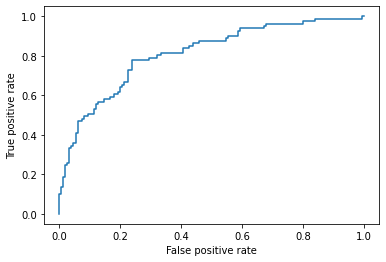

In [93]:
plt.figure()
plt.plot(fpr,tpr, label=" Logistic_model 1(area = %0.2f)" % Logrig_roc_auc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()